In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Chicago Arrest Records/chicagoarrestrecord.csv')
df.columns

Index(['CB_NO', 'CASE NUMBER', 'ARREST DATE', 'RACE', 'CHARGE 1 STATUTE',
       'CHARGE 1 DESCRIPTION', 'CHARGE 1 TYPE', 'CHARGE 1 CLASS',
       'CHARGE 2 STATUTE', 'CHARGE 2 DESCRIPTION', 'CHARGE 2 TYPE',
       'CHARGE 2 CLASS', 'CHARGE 3 STATUTE', 'CHARGE 3 DESCRIPTION',
       'CHARGE 3 TYPE', 'CHARGE 3 CLASS', 'CHARGE 4 STATUTE',
       'CHARGE 4 DESCRIPTION', 'CHARGE 4 TYPE', 'CHARGE 4 CLASS',
       'CHARGES STATUTE', 'CHARGES DESCRIPTION', 'CHARGES TYPE',
       'CHARGES CLASS'],
      dtype='object')

In [4]:
df.shape

(150471, 24)

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

1

In [6]:
numeric_df.columns

Index(['CB_NO'], dtype='object')

In [7]:
df.head()

,CB_NO,CASE NUMBER,ARREST DATE,RACE,CHARGE 1 STATUTE,CHARGE 1 DESCRIPTION,CHARGE 1 TYPE,CHARGE 1 CLASS,CHARGE 2 STATUTE,CHARGE 2 DESCRIPTION,...,CHARGE 3 TYPE,CHARGE 3 CLASS,CHARGE 4 STATUTE,CHARGE 4 DESCRIPTION,CHARGE 4 TYPE,CHARGE 4 CLASS,CHARGES STATUTE,CHARGES DESCRIPTION,CHARGES TYPE,CHARGES CLASS
0,18922700,NaN,06/26/2014 10:51:00 PM,BLACK,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,NaN,Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,725 ILCS 5.0/110-3 | | |,ISSUANCE OF WARRANT | | |,| | |,Z | | |
1,18922086,NaN,06/26/2014 12:07:00 AM,BLACK,625 ILCS 5.0/6-303-A,DRIVING ON SUSPENDED LICENSE,M,A,9-76-160(A),DISPLAY ST REG-FRONT/REAR,...,NaN,NaN,NaN,NaN,NaN,NaN,625 ILCS 5.0/6-303-A | 9-76-160(A) | |,DRIVING ON SUSPENDED LICENSE | DISPLAY ST REG-...,M | | |,A | L | |
2,18908465,HX290868,06/05/2014 11:58:00 AM,BLACK,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),F,4,720 ILCS 600.0/3.5-A,PCS - DRUG PARAPHERNALIA - POSSESS,...,NaN,NaN,NaN,NaN,NaN,NaN,720 ILCS 570.0/402-C | 720 ILCS 600.0/3.5-A | |,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...,F | M | |,4 | A | |
3,18914257,HX302763,06/14/2014 04:50:00 AM,BLACK,720 ILCS 5.0/12-3-A-1,BATTERY - CAUSE BODILY HARM,M,A,520 ILCS 5.0/1.22,RESIST/OBSTRUCT OFFICER,...,M,A,NaN,NaN,NaN,NaN,720 ILCS 5.0/12-3-A-1 | 520 ILCS 5.0/1.22 | 72...,BATTERY - CAUSE BODILY HARM | RESIST/OBSTRUCT ...,M | M | M |,A | A | A |
4,18911035,NaN,06/09/2014 08:45:00 AM,BLACK,8-4-030,DRINKING ALCOHOL ON THE PUBLIC WAY,NaN,L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8-4-030 | | |,DRINKING ALCOHOL ON THE PUBLIC WAY | | |,| | |,L | | |


In [8]:
df['ARREST DATE'].dtype

dtype('O')

In [9]:
df['ARREST DATE'] = pd.to_datetime(df['ARREST DATE'])

In [10]:
df['ARREST DATE'].dtype

dtype('<M8[ns]')

In [11]:
df['ARREST DATE']

0        2014-06-26 22:51:00
1        2014-06-26 00:07:00
2        2014-06-05 11:58:00
3        2014-06-14 04:50:00
4        2014-06-09 08:45:00
                 ...        
150466   2016-01-01 11:20:00
150467   2016-01-28 01:17:00
150468   2016-02-06 11:50:00
150469   2016-01-05 22:06:00
150470   2016-02-07 22:14:00
Name: ARREST DATE, Length: 150471, dtype: datetime64[ns]

In [12]:
race_stat = df.groupby('RACE').count()
race_stat = race_stat.reset_index('RACE')
race_stat

,RACE,CB_NO,CASE NUMBER,ARREST DATE,CHARGE 1 STATUTE,CHARGE 1 DESCRIPTION,CHARGE 1 TYPE,CHARGE 1 CLASS,CHARGE 2 STATUTE,CHARGE 2 DESCRIPTION,...,CHARGE 3 TYPE,CHARGE 3 CLASS,CHARGE 4 STATUTE,CHARGE 4 DESCRIPTION,CHARGE 4 TYPE,CHARGE 4 CLASS,CHARGES STATUTE,CHARGES DESCRIPTION,CHARGES TYPE,CHARGES CLASS
0,AMER INDIAN / ALASKAN NATIVE,135,51,135,135,135,96,131,39,39,...,7,17,8,8,2,8,135,135,135,135
1,ASIAN / PACIFIC ISLANDER,921,359,921,921,921,736,892,304,304,...,54,167,91,91,11,90,921,921,921,921
2,BLACK,106957,42734,106957,106957,106957,81391,103860,38494,38494,...,6275,18564,9531,9531,1717,9430,106957,106956,106956,106956
3,BLACK HISPANIC,877,390,877,877,877,717,864,339,339,...,61,173,96,96,20,95,877,877,877,877
4,UNKNOWN / REFUSED,252,99,252,252,252,201,244,92,92,...,16,56,25,25,3,25,252,252,252,252
5,WHITE,14477,5317,14477,14477,14477,11114,14020,4831,4831,...,780,2390,1276,1276,125,1259,14477,14477,14477,14477
6,WHITE HISPANIC,26852,9774,26852,26852,26852,21386,26161,11754,11754,...,2127,7172,4327,4327,493,4302,26852,26852,26852,26852


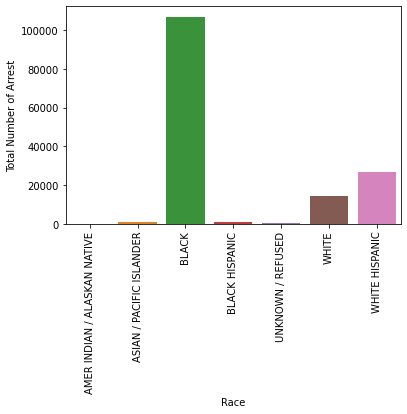

In [13]:
race_stat_plot = sns.barplot(x='RACE', y='CB_NO', data=race_stat)
plt.setp(race_stat_plot.get_xticklabels(), rotation=90)
race_stat_plot.set(xlabel='Race', ylabel='Total Number of Arrest')
plt.show()

In [14]:
race_stat['PERCENTAGE'] = (race_stat['CB_NO']/len(df))*100
race_stat_penc = race_stat.groupby('RACE')['PERCENTAGE'].mean()
race_stat_penc

RACE
AMER INDIAN / ALASKAN NATIVE     0.089718
ASIAN / PACIFIC ISLANDER         0.612078
BLACK                           71.081471
BLACK HISPANIC                   0.582837
UNKNOWN / REFUSED                0.167474
WHITE                            9.621123
WHITE HISPANIC                  17.845299
Name: PERCENTAGE, dtype: float64

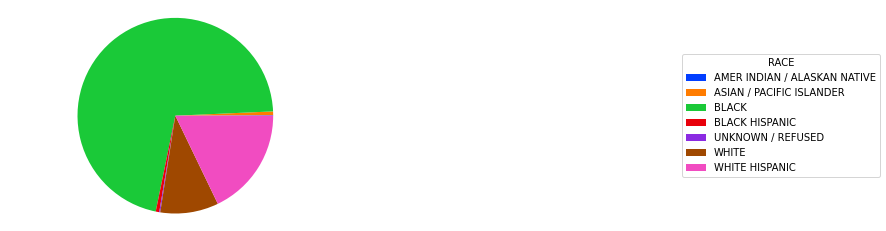

In [15]:
colors = sns.color_palette('bright')
#explode = (0.2, 0, 0.2,0,0.2,0,0.2)
plt.pie(race_stat_penc, colors=colors) #wedgeprops = {autopct='%.2f%%,'edgecolor':'white', 'linewidth':2, 'antialiased':True})
plt.legend(race_stat['RACE'], title='RACE', loc='center left', bbox_to_anchor=(2,0,0.5,1))
plt.axis('equal')
#plt.tight_layout()
plt.show()

In [16]:
df['YEAR'] = df['ARREST DATE'].dt.year
df['YEAR']

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
150466    2016
150467    2016
150468    2016
150469    2016
150470    2016
Name: YEAR, Length: 150471, dtype: int64

In [17]:
arrest_per_year = df.groupby('YEAR').count()
arrest_per_year = arrest_per_year.reset_index('YEAR')
arrest_per_year

,YEAR,CB_NO,CASE NUMBER,ARREST DATE,RACE,CHARGE 1 STATUTE,CHARGE 1 DESCRIPTION,CHARGE 1 TYPE,CHARGE 1 CLASS,CHARGE 2 STATUTE,...,CHARGE 3 TYPE,CHARGE 3 CLASS,CHARGE 4 STATUTE,CHARGE 4 DESCRIPTION,CHARGE 4 TYPE,CHARGE 4 CLASS,CHARGES STATUTE,CHARGES DESCRIPTION,CHARGES TYPE,CHARGES CLASS
0,2014,49707,34981,49707,49707,49707,49707,38082,49656,17127,...,2605,8452,4458,4458,537,4437,49707,49707,49707,49707
1,2015,76479,6519,76479,76479,76479,76479,58202,72231,27607,...,4458,13935,7521,7521,976,7397,76479,76479,76479,76479
2,2016,4672,2601,4672,4672,4672,4672,3794,4672,1985,...,288,1068,571,571,72,571,4672,4671,4671,4671
3,2018,1167,824,1167,1167,1167,1167,851,1167,318,...,22,101,32,32,1,32,1167,1167,1167,1167
4,2019,121,79,121,121,121,121,63,121,0,...,0,0,0,0,0,0,121,121,121,121
5,2020,105,80,105,105,105,105,84,105,58,...,14,38,27,27,4,27,105,105,105,105
6,2021,15481,11647,15481,15481,15481,15481,12396,15481,7454,...,1654,4223,2355,2355,683,2355,15481,15481,15481,15481
7,2022,2739,1993,2739,2739,2739,2739,2169,2739,1304,...,279,722,390,390,98,390,2739,2739,2739,2739


In [18]:
arrest_per_year.groupby('YEAR')['CB_NO'].sum()

YEAR
2014    49707
2015    76479
2016     4672
2018     1167
2019      121
2020      105
2021    15481
2022     2739
Name: CB_NO, dtype: int64

[Text(0, 0.5, 'Total Number of Arrests Per Year')]

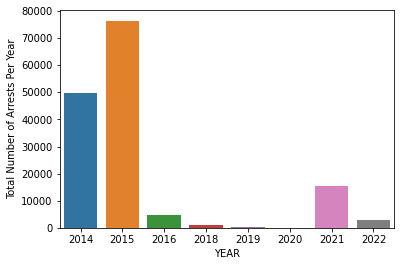

In [19]:
black_arrest_per_year_plot = sns.barplot(x='YEAR', y='CB_NO', data=arrest_per_year)
black_arrest_per_year_plot.set(ylabel='Total Number of Arrests Per Year')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


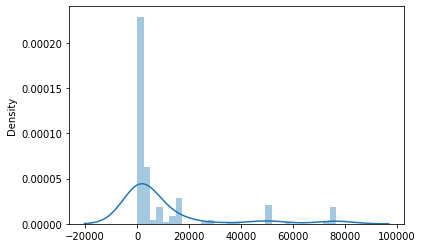

In [20]:
sns.distplot(arrest_per_year)

In [21]:
black_arrest = df[df['RACE'] == 'BLACK']
len (black_arrest)

106957

In [22]:
len(df)

150471

In [23]:
150471-106957

43514

In [24]:
black_arrest_per_year = black_arrest.groupby('YEAR')['CB_NO'].count()
black_arrest_per_year = black_arrest_per_year.reset_index('YEAR')
black_arrest_per_year

,YEAR,CB_NO
0,2014,35135
1,2015,54232
2,2016,3381
3,2018,852
4,2019,93
5,2020,72
6,2021,11281
7,2022,1911


[Text(0, 0.5, 'Total no of Arrests of Black Race people')]

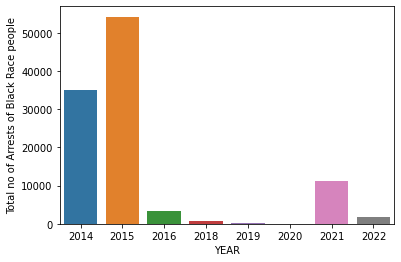

In [25]:
black_arrest_per_year_plot = sns.barplot(x='YEAR', y='CB_NO',data=black_arrest_per_year)
black_arrest_per_year_plot.set(ylabel='Total no of Arrests of Black Race people')

In [33]:
offence_category = df.groupby('CHARGE 1 TYPE').count()
offence_category = offence_category.reset_index('CHARGE 1 TYPE')
offence_category.groupby('CHARGE 1 TYPE')['CB_NO'].sum()

CHARGE 1 TYPE
A        6
F    39656
M    75973
R        5
V        1
Name: CB_NO, dtype: int64

[Text(0, 0.5, 'Number of Cases'), Text(0.5, 0, 'Charge Type')]

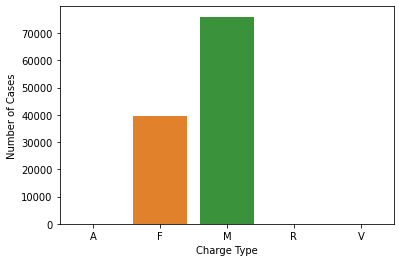

In [35]:
offence_category_graph= sns.barplot(x='CHARGE 1 TYPE', y='CB_NO', data=offence_category)
offence_category_graph.set(xlabel='Charge Type' ,ylabel='Number of Cases')